In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\david\anaconda3\envs\Dsci\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 30)

In [4]:
def df_from_VanExcelFiles(file_name):
    file = pd.ExcelFile(file_name)
    name = 'Sheet1'
    df = file.parse(name, header=1)
    df['Year'] = file_name[12:16]
    return df

In [5]:
os.chdir('data/BC_Ptax/')
files = os.listdir()
excel_files = [file for file in files if '.xls' in file]

In [6]:
bc_ptax05_22 = pd.concat([df_from_VanExcelFiles(xl) for xl in excel_files])

In [7]:
bc_ptax05_22.head(2)

,Municipalities,Type,RD,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Year,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
0,100 Mile House,D,CAR,Municipal,5.53707,40.00000,55.00000,8.61977,9.27090,9.68988,3.70597,2.74646,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100 Mile House,D,CAR,Reg'l District,1.83740,5.21621,5.63919,5.63919,4.06353,5.51221,2.07189,2.25099,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
bc_ptax05_22.tail(2)

,Municipalities,Type,RD,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Year,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
964,Zeballos,V,STR,Other,0.3443,1.5492,NaN,1.1557,0.8617,1.1637,0.3443,NaN,2022,0.1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5183,0.3443
965,Zeballos,V,STR,Totals,15.1785,55.0051,NaN,48.9596,28.9703,3.0637,14.0132,NaN,2022,0.2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0383,7.3243


In [9]:
bc_ptax05_22.columns

Index(['Municipalities', 'Type', 'RD', 'Purpose of Tax Rate', 'Residential',
       'Utilities', 'Major Industry', 'Light Industry', 'Business',
       'Managed Forest Land', 'Recreation Non-Profit', 'Farm', 'Year',
       'Supportive Housing', 'Major Industry*', 'Light Industry*', 'Farm*',
       'Municipalities**', 'Municipalities1', 'Major Industry2', 'Farm2',
       'Major Industry1', 'Farm1'],
      dtype='object')

In [10]:
bc_ptax05_22 = bc_ptax05_22[['Year', 'Type', 'RD', 'Municipalities', 'Purpose of Tax Rate','Residential','Utilities',
                             'Major Industry', 'Light Industry', 'Business', 'Managed Forest Land','Recreation Non-Profit', 'Farm', 'Supportive Housing','Major Industry*', 'Light Industry*', 'Farm*', 'Municipalities**','Municipalities1', 'Major Industry2', 'Farm2', 'Major Industry1','Farm1']]

In [11]:
bc_ptax05_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17340 entries, 0 to 965
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17340 non-null  object 
 1   Type                   17340 non-null  object 
 2   RD                     17262 non-null  object 
 3   Municipalities         15408 non-null  object 
 4   Purpose of Tax Rate    17340 non-null  object 
 5   Residential            17336 non-null  float64
 6   Utilities              17337 non-null  float64
 7   Major Industry         3780 non-null   float64
 8   Light Industry         12507 non-null  float64
 9   Business               17337 non-null  float64
 10  Managed Forest Land    17337 non-null  float64
 11  Recreation Non-Profit  17337 non-null  float64
 12  Farm                   5712 non-null   float64
 13  Supportive Housing     13557 non-null  float64
 14  Major Industry*        4830 non-null   float64
 15  Ligh

In [12]:
bc_ptax05_22['Year'] = bc_ptax05_22['Year'].apply(pd.to_numeric)

In [13]:
bc_ptax05_22.isna().sum()

Year                         0
Type                         0
RD                          78
Municipalities            1932
Purpose of Tax Rate          0
Residential                  4
Utilities                    3
Major Industry           13560
Light Industry            4833
Business                     3
Managed Forest Land          3
Recreation Non-Profit        3
Farm                     11628
Supportive Housing        3783
Major Industry*          12510
Light Industry*          12510
Farm*                    14442
Municipalities**         16374
Municipalities1          16374
Major Industry2          16374
Farm2                    16374
Major Industry1           9579
Farm1                     9579
dtype: int64

In [14]:
bc_ptax05_22[bc_ptax05_22['Residential'].isna()]

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
318,2020,V,EKO,Jumbo Glacier,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,2020,V,EKO,Jumbo Glacier,Reg'l District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2020,V,EKO,Jumbo Glacier,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,2020,V,EKO,Jumbo Glacier,School,NaN,13.03,NaN,1.0561,1.107,0.0001,0.7844,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,7.05


In [15]:
bc_ptax05_22[bc_ptax05_22['Business'].isna()]

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
318,2020,V,EKO,Jumbo Glacier,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,2020,V,EKO,Jumbo Glacier,Reg'l District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2020,V,EKO,Jumbo Glacier,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
bc_ptax05_22[bc_ptax05_22['Residential'].isna()]

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
318,2020,V,EKO,Jumbo Glacier,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,2020,V,EKO,Jumbo Glacier,Reg'l District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2020,V,EKO,Jumbo Glacier,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,2020,V,EKO,Jumbo Glacier,School,NaN,13.03,NaN,1.0561,1.107,0.0001,0.7844,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,7.05


In [17]:
bc_ptax05_22[bc_ptax05_22.columns.difference(['Year'])].isnull().groupby(bc_ptax05_22.Year).sum().astype(int)

,Business,Farm,Farm*,Farm1,Farm2,Light Industry,Light Industry*,Major Industry,Major Industry*,Major Industry1,Major Industry2,Managed Forest Land,Municipalities,Municipalities**,Municipalities1,Purpose of Tax Rate,RD,Recreation Non-Profit,Residential,Supportive Housing,Type,Utilities
Year,,,,,,,,,,,,,,,,,,,,,,
2005,0,0,936,936,936,0,936,0,936,936,936,0,0,936,936,0,0,0,0,936,0,0
2006,0,0,942,942,942,0,942,0,942,942,942,0,0,942,942,0,0,0,0,942,0,0
2007,0,0,942,942,942,0,942,0,942,942,942,0,0,942,942,0,0,0,0,942,0,0
2008,0,0,960,960,960,0,960,0,960,960,960,0,0,960,960,0,0,0,0,960,0,0
2009,0,0,966,966,966,966,0,966,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2010,0,0,966,966,966,966,0,966,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2011,0,966,0,966,966,966,0,966,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2012,0,966,0,966,966,966,0,966,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2013,0,966,0,966,966,966,0,966,0,966,966,0,966,0,966,0,6,0,0,0,0,0


In [18]:
bc_ptax05_22[(bc_ptax05_22['Municipalities**'] == 'Vancouver') & (bc_ptax05_22['Year'] == 2013)].head(2)

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
888,2013,C,GVR,NaN,Municipal,1.89502,36.36144,NaN,NaN,8.20424,0.0,1.81589,NaN,0.00000,32.98091,8.20424,1.81589,Vancouver,NaN,NaN,NaN,NaN,NaN
889,2013,C,GVR,NaN,Reg'l District,0.06155,0.21543,NaN,NaN,0.15080,0.0,0.06155,NaN,0.06155,0.20927,0.20927,0.06155,Vancouver,NaN,NaN,NaN,NaN,NaN


In [19]:
replace2009_10 = ['Major Industry', 'Light Industry']
with2009_10 = ['Major Industry*', 'Light Industry*']

replace2011_12 = ['Major Industry','Light Industry', 'Farm']
with2011_12 = ['Major Industry*','Light Industry*', 'Farm*']

replace2013 = ['Municipalities', 'Major Industry', 'Light Industry', 'Farm']
with2013 = ['Municipalities**', 'Major Industry*', 'Light Industry*', 'Farm*']

replace2014 = ['Municipalities','Major Industry', 'Farm']
with2014 = ['Municipalities1', 'Major Industry2', 'Farm2']

replace2015_2022 = ['Major Industry', 'Farm']
with2015_2022 = ['Major Industry1', 'Farm1']

#for item in replace

In [20]:
def replace_column(df, year,replace_data,with_data):
    count = 0
    while count < len(replace_data):
        print(replace_data[count])
        print(with_data[count])
        df.loc[df['Year'] == year, replace_data[count]] = df.loc[df['Year'] == year, with_data[count]]
        count += 1

In [21]:
years = [2009,2010]
for year in years:
    replace_column(bc_ptax05_22, year, replace2009_10, with2009_10)

Major Industry
Major Industry*
Light Industry
Light Industry*
Major Industry
Major Industry*
Light Industry
Light Industry*


In [22]:
years = [2011,2012]
for year in years:
    replace_column(bc_ptax05_22, year, replace2011_12, with2011_12)

Major Industry
Major Industry*
Light Industry
Light Industry*
Farm
Farm*
Major Industry
Major Industry*
Light Industry
Light Industry*
Farm
Farm*


In [23]:
replace_column(bc_ptax05_22, 2013, replace2013, with2013)

Municipalities
Municipalities**
Major Industry
Major Industry*
Light Industry
Light Industry*
Farm
Farm*


In [24]:
replace_column(bc_ptax05_22, 2014, replace2014, with2014 )

Municipalities
Municipalities1
Major Industry
Major Industry2
Farm
Farm2


In [25]:
years = [2015,2016,2017,2018,2019,2020,2021,2022]
for year in years:
    replace_column(bc_ptax05_22,year,replace2015_2022, with2015_2022)

Major Industry
Major Industry1
Farm
Farm1
Major Industry
Major Industry1
Farm
Farm1
Major Industry
Major Industry1
Farm
Farm1
Major Industry
Major Industry1
Farm
Farm1
Major Industry
Major Industry1
Farm
Farm1
Major Industry
Major Industry1
Farm
Farm1
Major Industry
Major Industry1
Farm
Farm1
Major Industry
Major Industry1
Farm
Farm1


In [26]:
bc_ptax05_22[(bc_ptax05_22['Municipalities'] == 'Vancouver') & (bc_ptax05_22['Year'] == 2012)].head(2)

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
888,2012,C,GVR,Vancouver,Municipal,2.02002,38.31904,31.98356,8.78096,8.78096,0.0,1.79591,1.79591,0.00000,31.98356,8.78096,1.79591,NaN,NaN,NaN,NaN,NaN,NaN
889,2012,C,GVR,Vancouver,Reg'l District,0.06341,0.22192,0.21558,0.21558,0.15535,0.0,0.06341,0.06341,0.06341,0.21558,0.21558,0.06341,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
bc_ptax05_22[bc_ptax05_22.columns.difference(['Year'])].isnull().groupby(bc_ptax05_22.Year).sum().astype(int)

,Business,Farm,Farm*,Farm1,Farm2,Light Industry,Light Industry*,Major Industry,Major Industry*,Major Industry1,Major Industry2,Managed Forest Land,Municipalities,Municipalities**,Municipalities1,Purpose of Tax Rate,RD,Recreation Non-Profit,Residential,Supportive Housing,Type,Utilities
Year,,,,,,,,,,,,,,,,,,,,,,
2005,0,0,936,936,936,0,936,0,936,936,936,0,0,936,936,0,0,0,0,936,0,0
2006,0,0,942,942,942,0,942,0,942,942,942,0,0,942,942,0,0,0,0,942,0,0
2007,0,0,942,942,942,0,942,0,942,942,942,0,0,942,942,0,0,0,0,942,0,0
2008,0,0,960,960,960,0,960,0,960,960,960,0,0,960,960,0,0,0,0,960,0,0
2009,0,0,966,966,966,0,0,0,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2010,0,0,966,966,966,0,0,0,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2011,0,0,0,966,966,0,0,0,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2012,0,0,0,966,966,0,0,0,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2013,0,0,0,966,966,0,0,0,0,966,966,0,0,0,966,0,6,0,0,0,0,0


In [28]:
bc_ptax05_22.columns

Index(['Year', 'Type', 'RD', 'Municipalities', 'Purpose of Tax Rate',
       'Residential', 'Utilities', 'Major Industry', 'Light Industry',
       'Business', 'Managed Forest Land', 'Recreation Non-Profit', 'Farm',
       'Supportive Housing', 'Major Industry*', 'Light Industry*', 'Farm*',
       'Municipalities**', 'Municipalities1', 'Major Industry2', 'Farm2',
       'Major Industry1', 'Farm1'],
      dtype='object')

In [29]:
bc_ptax05_22.drop(columns=['Major Industry*', 'Light Industry*', 'Farm*', 'Municipalities**', 'Municipalities1', 'Major Industry2', 'Farm2', 'Major Industry1', 'Farm1'], inplace=True)

In [30]:
bc_ptax05_22.head(2)

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing
0,2005,D,CAR,100 Mile House,Municipal,5.53707,40.00000,55.00000,8.61977,9.27090,9.68988,3.70597,2.74646,NaN
1,2005,D,CAR,100 Mile House,Reg'l District,1.83740,5.21621,5.63919,5.63919,4.06353,5.51221,2.07189,2.25099,NaN


In [31]:
bc_ptax05_22.iloc[:,5:] = bc_ptax05_22.iloc[:,5:] * 0.001

In [32]:
bc_ptax05_22[(bc_ptax05_22['Municipalities'] == 'North Vancouver') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing
540,2012,D,GVR,North Vancouver,Municipal,0.002364,0.04,0.041171,0.019528,0.008538,0.0,0.006074,0.0,0.0
546,2017,D,GVR,North Vancouver,Municipal,0.001607,0.04,0.028408,0.010451,0.007070,0.0,0.004785,0.0,0.0
546,2018,D,GVR,North Vancouver,Municipal,0.001593,0.04,0.023446,0.007721,0.005599,0.0,0.004472,0.0,0.0
546,2019,D,GVR,North Vancouver,Municipal,0.001661,0.04,0.022366,0.007094,0.004628,0.0,0.004143,0.0,0.0


In [33]:
bc_ptax05_22[bc_ptax05_22['Year'] == 2008]['Municipalities'].unique()

array(['100 Mile House', 'Abbotsford ', 'Abbotsford', 'Alert Bay',
       'Anmore', 'Armstrong', 'Ashcroft', 'Barriere', 'Belcarra',
       'Bowen Island', 'Burnaby', 'Burns Lake', 'Cache Creek',
       'Campbell River', 'Canal Flats', 'Castlegar', 'Central Saanich',
       'Chase', 'Chetwynd', 'Chilliwack', 'Clearwater', 'Clinton',
       'Coldstream', 'Colwood', 'Comox', 'Coquitlam', 'Courtenay',
       'Cranbrook', 'Creston', 'Cumberland', 'Dawson Creek', 'Delta',
       'Duncan', 'Elkford', 'Enderby', 'Esquimalt', 'Fernie',
       'Fort Nelson', 'Fort St. James', 'Fort St. John', 'Fraser Lake',
       'Fruitvale', 'Gibsons', 'Gold River', 'Golden', 'Grand Forks',
       'Granisle', 'Greenwood', 'Harrison Hot Springs', 'Hazelton',
       'Highlands', 'Hope', 'Houston', "Hudson's Hope", 'Invermere',
       'Kamloops', 'Kaslo', 'Kelowna', 'Kent', 'Keremeos', 'Kimberley',
       'Kitimat', 'Ladysmith', 'Lake Country', 'Lake Cowichan',
       'Langford', 'Langley', 'Langley ', 'Lantzvil

In [34]:
bc_ptax05_22['Municipalities'] = bc_ptax05_22['Municipalities'].str.strip()

In [35]:
cities = ['North Vancouver', 'Langley']

for city in cities:
    bc_ptax05_22.loc[bc_ptax05_22['Municipalities'] == city +' - **', 'Municipalities'] = city
for city in cities:
    bc_ptax05_22.loc[(bc_ptax05_22['Municipalities'] == city) & (bc_ptax05_22['Type'] == 'D'), 'Municipalities'] = city + ' - D'
for city in cities:
    bc_ptax05_22.loc[bc_ptax05_22['Municipalities'] == city +' - C', 'Municipalities'] = city

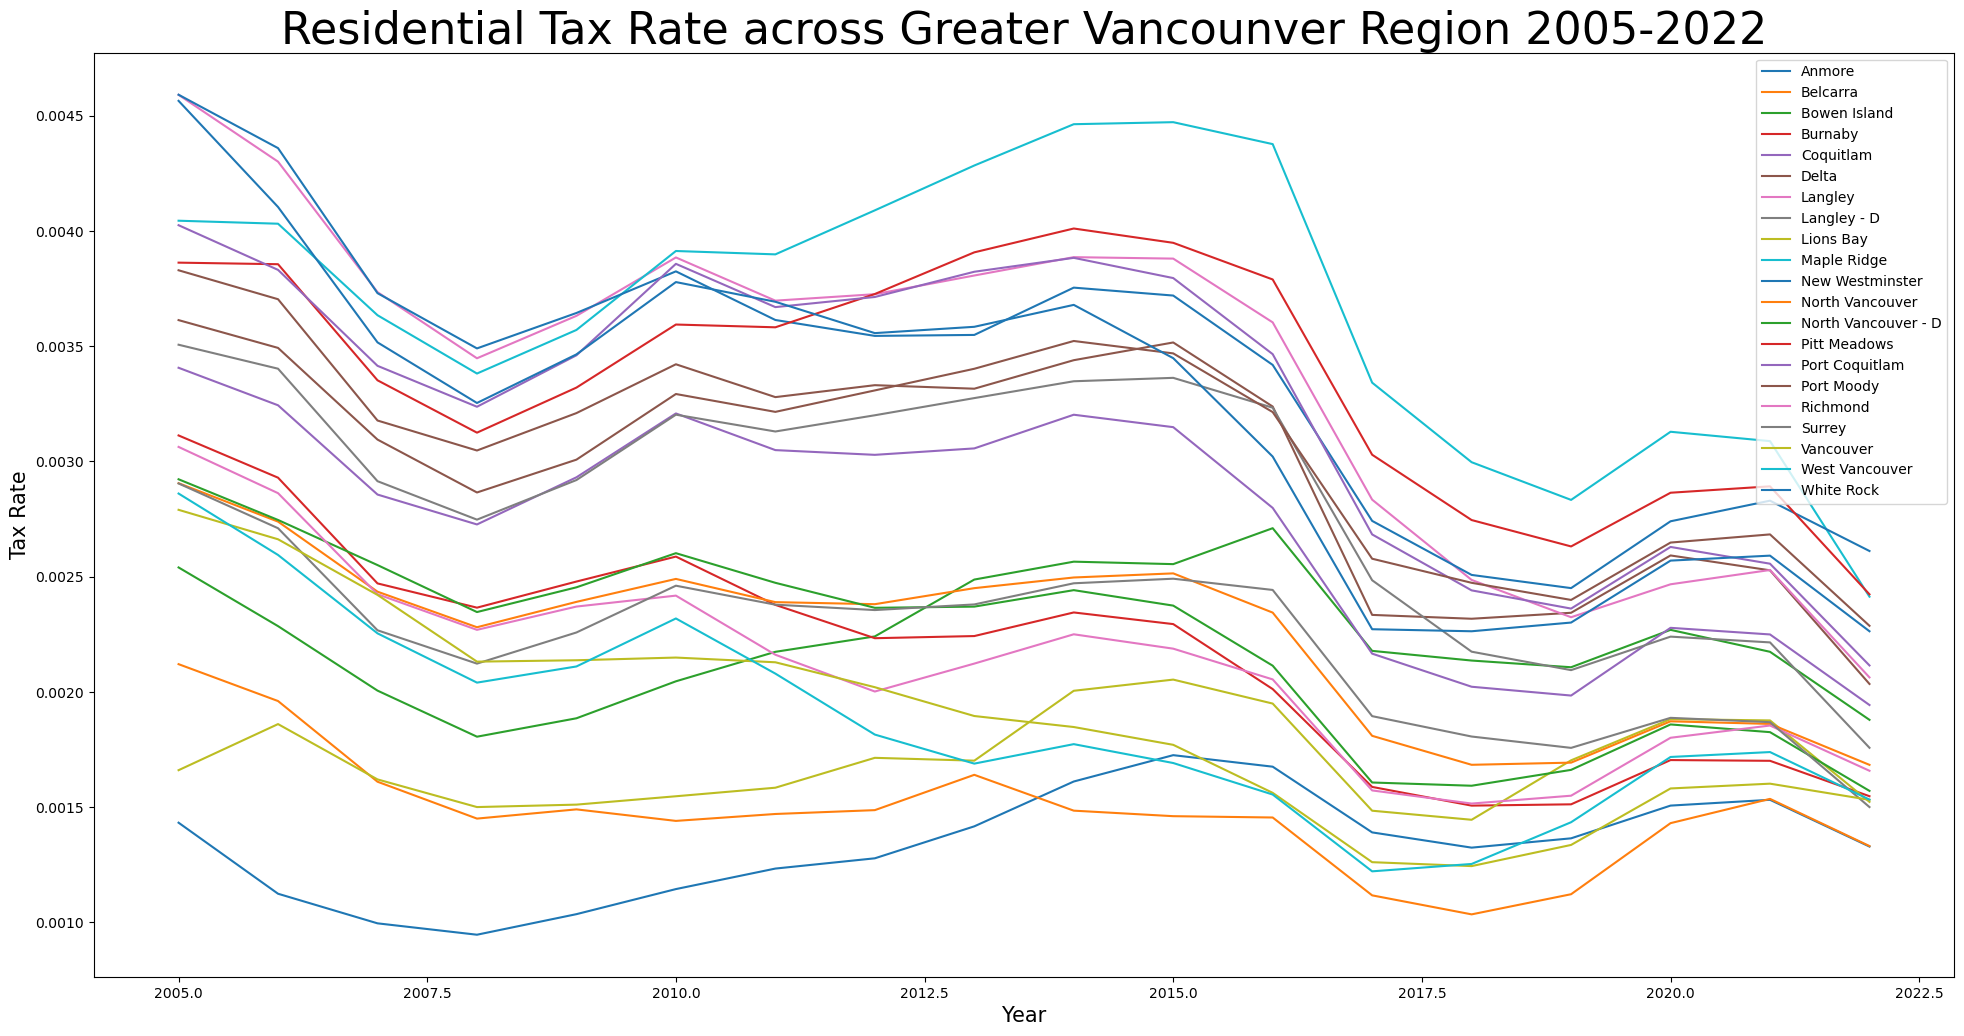

In [36]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = bc_ptax05_22[bc_ptax05_22['RD'] == 'GVR']['Municipalities'].unique()

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Residential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate across Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()


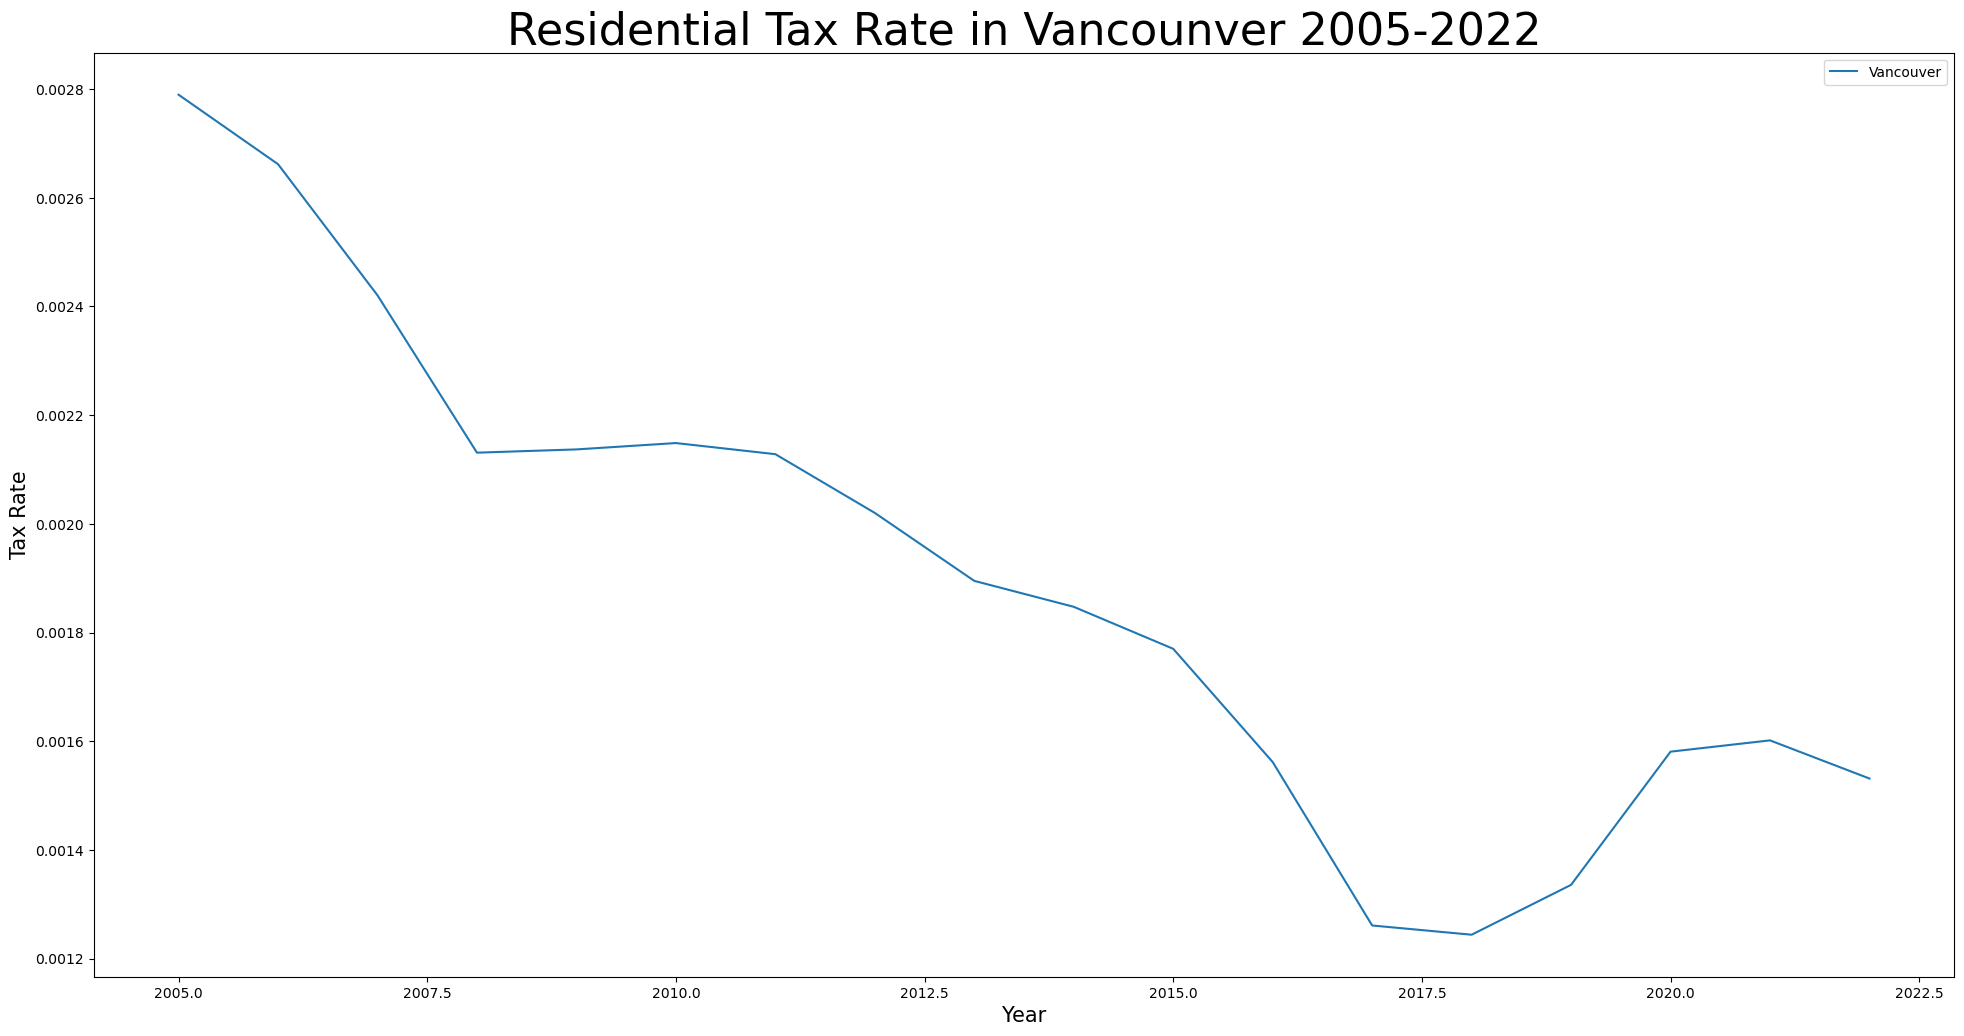

In [37]:
data=bc_ptax05_22[(bc_ptax05_22['Municipalities'] == 'Vancouver') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')][['Year', 'Residential']]

plt.figure(figsize=(24,12))
plt.plot(data.iloc[:, 0], data.iloc[:,1], label='Vancouver')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate in Vancounver 2005-2022', fontsize=32)
plt.legend()
plt.show()

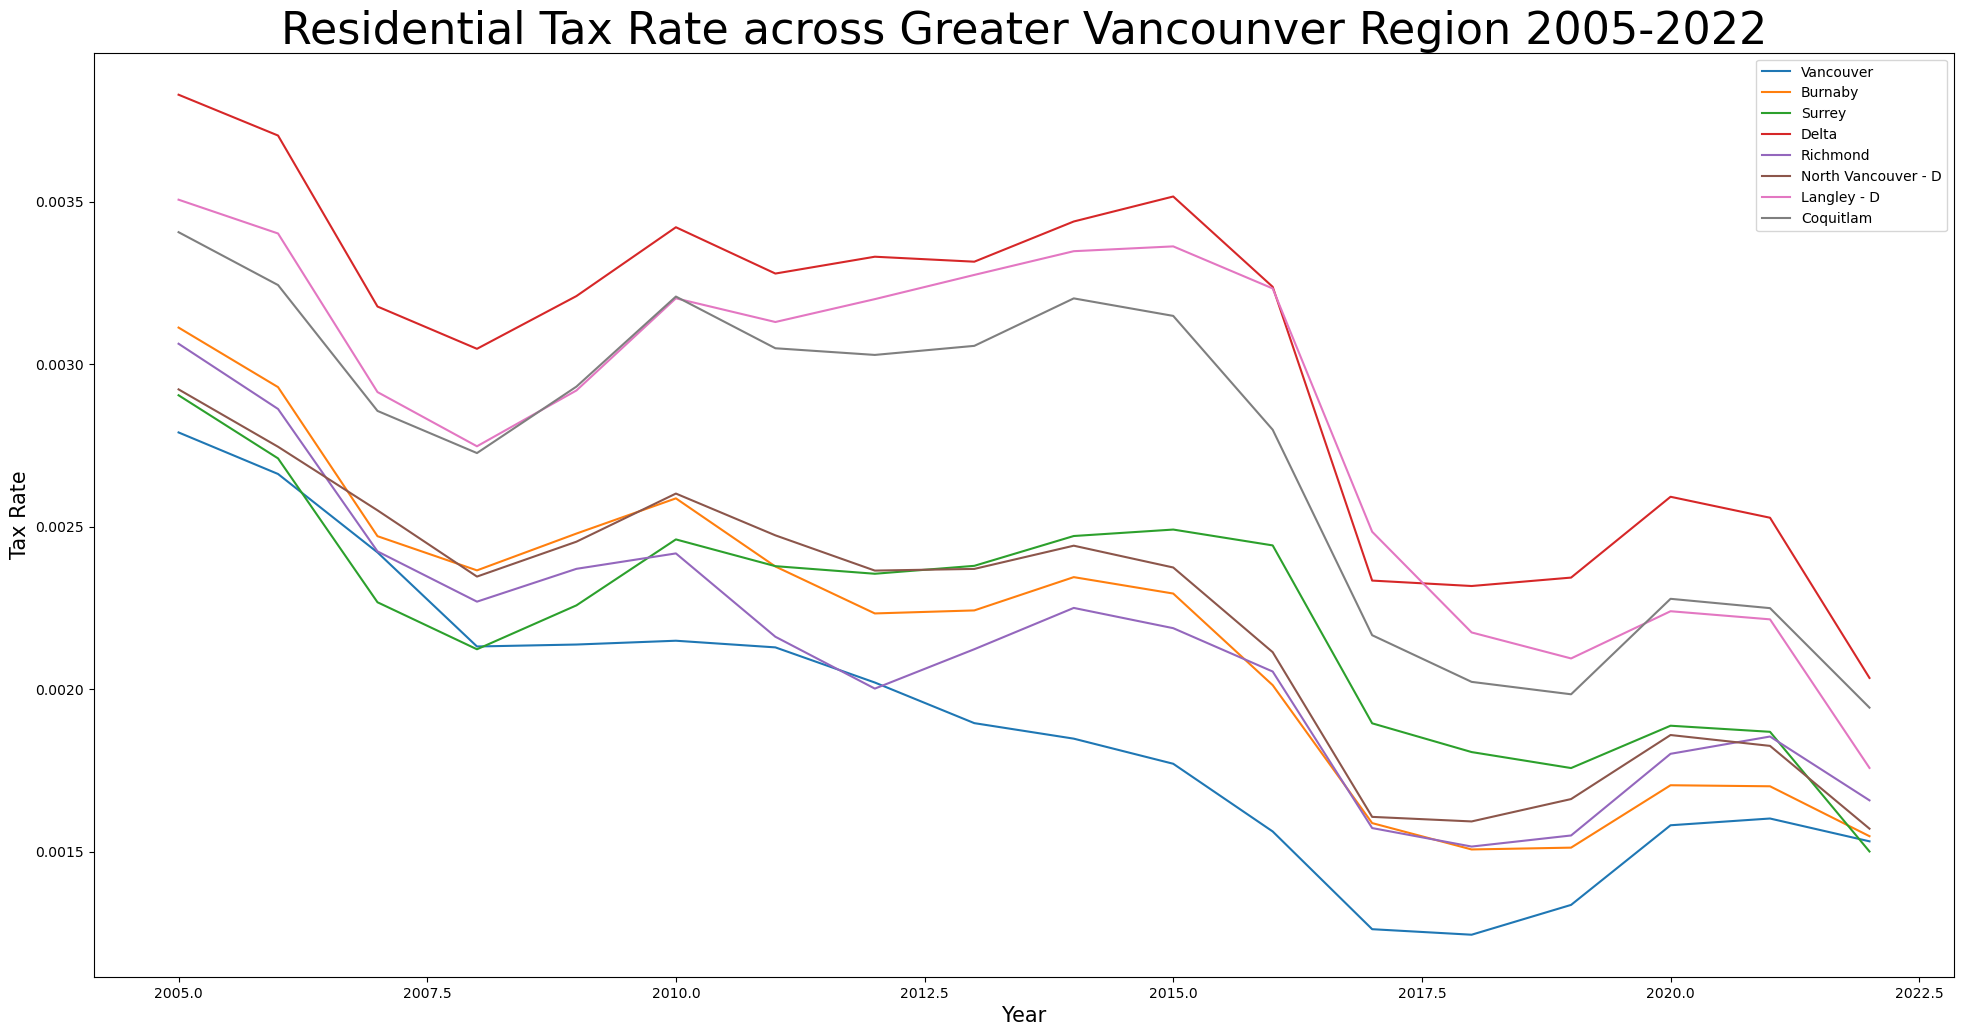

In [38]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = ['Vancouver', 'Burnaby', 'Surrey', 'Delta', 'Richmond', 'North Vancouver - D', 'Langley - D', 'Coquitlam']

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Residential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate across Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()